In [1]:
%matplotlib widget

In [2]:
import numpy as np
from shape_model.gaussian_ellipsoid import gaussian_ellipsoid_shape_model

In [3]:
# Define the ellipsoid parameters a >= b >= c
#### length_unit= um ###
r_v_base= 0.5 # allowed range = [0.1, 0.5], volume equivalent radius of base ellipsoid
bc_ratio= 1 # allowed range = [1.0, 5], b/c ratio of base ellipsoid
ab_ratio= 1 # allowed range = [1.0, 2.0], a/b ratio of base ellipsoid
beta= 0.3 # standard deviation of GE surface deformation, allowed range= [0, 0.3]


In [4]:
gre_shape_model= gaussian_ellipsoid_shape_model(r_v_base, bc_ratio, ab_ratio, beta) 

In [5]:
rng= np.random.default_rng()
r_points_on_GRE_surf, xyz_meshes_GRE_surf = gre_shape_model.compute_r_points_on_GRE(rng)

In [6]:
lattice_domain, lattice_n, lattice_grid_points= gre_shape_model.create_cuboid_lattice_that_encloses_GRE_shape(r_points_on_GRE_surf)
lattice_n

array([43, 34, 37], dtype=int32)

In [7]:
dist_from_GRE= gre_shape_model.find_nearest_distance_from_the_GRE_surf(lattice_grid_points, r_points_on_GRE_surf)

In [8]:
lattice_grid_points_is_in_GREvol= gre_shape_model.extract_lattice_address_in_GRE_volume(gre_shape_model.lattice_lf, gre_shape_model.distance_factor, lattice_n, dist_from_GRE)

In [9]:
volume_GRE, ve_radius_GRE= gre_shape_model.compute_GRE_volume_and_ve_radius(lattice_grid_points_is_in_GREvol)
volume_GRE, ve_radius_GRE

(np.float64(0.5148843910565121), np.float64(0.4972105925994541))

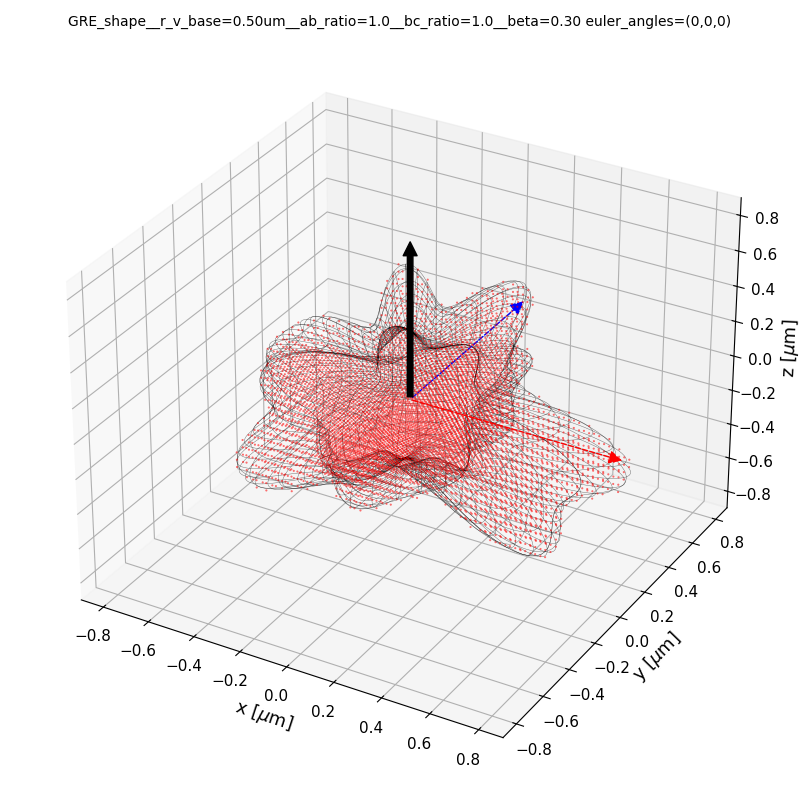

In [10]:
euler_angles_deg= np.array([0,0,0],dtype=np.float32) # alpha, beta, gamma

gre_shape_model.visualize_the_generated_GRE_shape_and_incindent_beam( xyz_meshes_GRE_surf, lattice_grid_points, lattice_grid_points_is_in_GREvol, euler_angles_deg)